# Sentiment Analysis of W.E.B. Du Bois' The Souls of Black Folk
## by Erika Harrell

### Executive summary
#### The following project was conducted to determine the sentiment of text from 15 essays in W.E.B. Du Bois The Souls of Black Folk. Text was scraped from the Project Gutenberg webpage and each sentence was placed into a row in a data frame. The cleaned dataset contained 2,640 sentences. Next, analysis was done to determine the length of each sentence in each essay. After which, compound scores of sentiment for each sentence were generated using the Sentiment Intensity Analyzer from the Vader package. Based on these scores, a label was created classifying each sentence as either negative, positive, or neutral. The mean compound score for all sentences was about 0.02 showing that, on average, the sentences in the book were neutral (-0.05 < compound score < 0.05).

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
#python's lxml library parses xml and html files
from lxml import html
#python requests library gets data from web pages
import requests
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import re

## Web scraping to get essay titles and text
## Data wrangling to put text in data frames

In [2]:
#essay titles
page = requests.get('https://www.gutenberg.org/files/408/408-h/408-h.htm')
mytree = html.fromstring(page.content)
titles = mytree.xpath('body/table/tr/td/a/text()')
titles

['The Forethought',
 'Of Our Spiritual Strivings',
 'Of the Dawn of Freedom',
 'Of Mr. Booker T. Washington and Others',
 'Of the Meaning of Progress',
 'Of the Wings of Atalanta',
 'Of the Training of Black Men',
 'Of the Black Belt',
 'Of the Quest of the Golden Fleece',
 'Of the Sons of Master and Man',
 'Of the Faith of the Fathers',
 'Of the Passing of the First-Born',
 'Of Alexander Crummell',
 'Of the Coming of John',
 'Of the Sorrow Songs',
 'The Afterthought']

In [3]:
#Forethought
fore = mytree.xpath('body/div[@class="chapter"]/p/text()')[0:4]
#use list comprehension to remove extra text in list
fore=[a.replace("\r\n"," ") for a in fore]
fore=[b.replace("Mr.","Mr") for b in fore]
fore=[c.replace("Mrs.","Mrs") for c in fore]
fore=[d.replace("MRS.","MRS") for d in fore]
fore=[e.replace("MR.","MR") for e in fore]
fore=[g.strip() for g in fore]
#make each sentence an element in list
fore1=[re.split(r'\. |\? |\! |\" ',h) for h in fore]
fore = []
for inner_list in fore1:
    for ele in inner_list:
        fore.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(fore):
    title.append(titles[0])
    i+=1

#create dictionary of lists
dict={'text':fore,'title':title}
#create data frame
fore_df=pd.DataFrame(dict)
fore_df

,text,title
0,Herein lie buried many things which if read wi...,The Forethought
1,"This meaning is not without interest to you, G...",The Forethought
2,"I pray you, then, receive my little book in al...",The Forethought
3,"I have sought here to sketch, in vague, uncert...",The Forethought
4,"First, in two chapters I have tried to show wh...",The Forethought
5,In a third chapter I have pointed out the slow...,The Forethought
6,"Then, in two other chapters I have sketched in...",The Forethought
7,"Venturing now into deeper detail, I have in tw...",The Forethought
8,"Leaving, then, the white world, I have stepped...",The Forethought
9,All this I have ended with a tale twice told b...,The Forethought


In [4]:
#Of Our Spiritual Strivings
e1 = mytree.xpath('body/div[@class="chapter"]/p/text()')[19:40]
#use list comprehension to remove extra text in list
e1=[a.replace("\r\n"," ") for a in e1]
e1=[b.replace("Mr.","Mr") for b in e1]
e1=[c.replace("Mrs.","Mrs") for c in e1]
e1=[d.replace("MRS.","MRS") for d in e1]
e1=[e.replace("MR.","MR") for e in e1]
e1=[g.strip() for g in e1]
#code to put in missing text and merge split paragraph
e1[17]=e1[17]+' Sturm und Drang:'+ e1[18] 
del e1[18]

#make each sentence an element in list
e11=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e1]
e1 = []
for inner_list in e11:
    for ele in inner_list:
        e1.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e1):
    title.append(titles[1])
    i+=1

#create dictionary of lists
dict={'text':e1,'title':title}
#create data frame
e1_df=pd.DataFrame(dict)
e1_df

,text,title
0,Between me and the other world there is ever a...,Of Our Spiritual Strivings
1,"All, nevertheless, flutter round it",Of Our Spiritual Strivings
2,They approach me in a half-hesitant sort of wa...,Of Our Spiritual Strivings
3,"they say, I know an excellent colored man in m...",Of Our Spiritual Strivings
4,"At these I smile, or am interested, or reduce ...",Of Our Spiritual Strivings
...,...,...
104,Will America be poorer if she replace her brut...,Of Our Spiritual Strivings
105,or her coarse and cruel wit with loving jovial...,Of Our Spiritual Strivings
106,or her vulgar music with the soul of the Sorro...,Of Our Spiritual Strivings
107,Merely a concrete test of the underlying princ...,Of Our Spiritual Strivings


In [5]:
#Of the Dawn of Freedom
e2 = mytree.xpath('body/div[@class="chapter"]/p/text()')[52:95]
#use list comprehension to remove extra text in list
e2=[a.replace("\r\n"," ") for a in e2]
e2=[b.replace("Mr.","Mr") for b in e2]
e2=[c.replace("Mrs.","Mrs") for c in e2]
e2=[d.replace("MRS.","MRS") for d in e2]
e2=[e.replace("MR.","MR") for e in e2]
e2=[g.strip() for g in e2]
#code to put in missing text and merge split paragraphs
e2[30]=e2[30]+' personnel ' + e2[31]
del e2[31]
e2[38]=e2[38] + ' proteges '+ e2[39]
del e2[39]

#make each sentence an element in list
e21=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e2]
e2 = []
for inner_list in e21:
    for ele in inner_list:
        e2.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e2):
    title.append(titles[2])
    i+=1

#create dictionary of lists
dict={'text':e2,'title':title}
#create data frame
e2_df=pd.DataFrame(dict)
e2_df

,text,title
0,The problem of the twentieth century is the pr...,Of the Dawn of Freedom
1,It was a phase of this problem that caused the...,Of the Dawn of Freedom
2,"Curious it was, too, how this deeper question ...",Of the Dawn of Freedom
3,No sooner had Northern armies touched Southern...,Of the Dawn of Freedom
4,Peremptory military commands this way and that...,Of the Dawn of Freedom
...,...,...
238,"I have seen a land right merry with the sun, w...",Of the Dawn of Freedom
239,And there in the King’s Highways sat and sits ...,Of the Dawn of Freedom
240,On the tainted air broods fear,Of the Dawn of Freedom
241,Three centuries’ thought has been the raising ...,Of the Dawn of Freedom


In [6]:
#Of Mr. Booker T. Washington and Others
e3 = mytree.xpath('body/div[@class="chapter"]/p/text()')[101:142]
#use list comprehension to remove extra text in list
e3=[a.replace("\r\n"," ") for a in e3]
e3=[b.replace("Mr.","Mr") for b in e3]
e3=[c.replace("Mrs.","Mrs") for c in e3]
e3=[d.replace("MRS.","MRS") for d in e3]
e3=[e.replace("MR.","MR") for e in e3]
e3=[g.strip() for g in e3]
#code to put in missing text and merge split paragraphs
e3[13]=e3[13] + ' through ' + e3[14]
del e3[14]

#make each sentence an element in list
e31=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e3]
e3 = []
for inner_list in e31:
    for ele in inner_list:
        e3.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e3):
    title.append(titles[3])
    i+=1

#create dictionary of lists
dict={'text':e3,'title':title}
#create data frame
e3_df=pd.DataFrame(dict)
e3_df

,text,title
0,Easily the most striking thing in the history ...,Of Mr. Booker T. Washington and Others
1,Washington,Of Mr. Booker T. Washington and Others
2,It began at the time when war memories and ide...,Of Mr. Booker T. Washington and Others
3,"Mr Washington came, with a simple definite pro...",Of Mr. Booker T. Washington and Others
4,"His programme of industrial education, concili...",Of Mr. Booker T. Washington and Others
...,...,...
152,"If worse come to worst, can the moral fibre of...",Of Mr. Booker T. Washington and Others
153,The black men of America have a duty to perfor...,Of Mr. Booker T. Washington and Others
154,"So far as Mr Washington preaches Thrift, Patie...",Of Mr. Booker T. Washington and Others
155,But so far as Mr Washington apologizes for inj...,Of Mr. Booker T. Washington and Others


In [7]:
#Of the Meaning of Progress
e4 = mytree.xpath('body/div[@class="chapter"]/p/text()')[152:177]
#use list comprehension to remove extra text in list
e4=[a.replace("\r\n"," ") for a in e4]
e4=[b.replace("Mr.","Mr") for b in e4]
e4=[c.replace("Mrs.","Mrs") for c in e4]
e4=[d.replace("MRS.","MRS") for d in e4]
e4=[e.replace("MR.","MR") for e in e4]
e4=[g.strip() for g in e4]

#make each sentence an element in list
e41=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e4]
e4 = []
for inner_list in e41:
    for ele in inner_list:
        e4.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e4):
    title.append(titles[4])
    i+=1

#create dictionary of lists
dict={'text':e4,'title':title}
#create data frame
e4_df=pd.DataFrame(dict)
e4_df

,text,title
0,Once upon a time I taught school in the hills ...,Of the Meaning of Progress
1,"I was a Fisk student then, and all Fisk men th...",Of the Meaning of Progress
2,"Young and happy, I too went, and I shall not s...",Of the Meaning of Progress
3,"First, there was a Teachers’ Institute at the ...",Of the Meaning of Progress
4,"A picnic now and then, and a supper, and the r...",Of the Meaning of Progress
...,...,...
173,How shall man measure Progress there where the...,Of the Meaning of Progress
174,How many heartfuls of sorrow shall balance a b...,Of the Meaning of Progress
175,"How hard a thing is life to the lowly, and yet...",Of the Meaning of Progress
176,And all this life and love and strife and fail...,Of the Meaning of Progress


In [8]:
#Of the Wings of Atalanta
e5 = mytree.xpath('body/div[@class="chapter"]/p/text()')[187:211]
#use list comprehension to remove extra text in list
e5=[a.replace("\r\n"," ") for a in e5]
e5=[b.replace("Mr.","Mr") for b in e5]
e5=[c.replace("Mrs.","Mrs") for c in e5]
e5=[d.replace("MRS.","MRS") for d in e5]
e5=[e.replace("MR.","MR") for e in e5]
e5=[g.strip() for g in e5]
#code to put in missing text and merge split paragraphs
e5[1]=e5[1] + ' reclame ' + e5[2]
del e5[2]
e5[11]=e5[11] + ' trivium ' + e5[12] + ' quadrivium ' + e5[13]
del e5[12]
del e5[12]

#make each sentence an element in list
e51=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e5]
e5 = []
for inner_list in e51:
    for ele in inner_list:
        e5.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e5):
    title.append(titles[5])
    i+=1

#create dictionary of lists
dict={'text':e5,'title':title}
#create data frame
e5_df=pd.DataFrame(dict)
e5_df

,text,title
0,"South of the North, yet north of the South, li...",Of the Wings of Atalanta
1,"I have seen her in the morning, when the first...",Of the Wings of Atalanta
2,"Once, they say, even Atlanta slept dull and dr...",Of the Wings of Atalanta
3,And the sea cried to the hills and the hills a...,Of the Wings of Atalanta
4,It is a hard thing to live haunted by the ghos...,Of the Wings of Atalanta
...,...,...
91,And all this is gained only by human strife an...,Of the Wings of Atalanta
92,When night falls on the City of a Hundred Hill...,Of the Wings of Atalanta
93,"And at its bidding, the smoke of the drowsy fa...",Of the Wings of Atalanta
94,And they say that yon gray mist is the tunic o...,Of the Wings of Atalanta


In [9]:
#Of the Training of Black Men
e6 = mytree.xpath('body/div[@class="chapter"]/p/text()')[217:251]
#use list comprehension to remove extra text in list
e6=[a.replace("\r\n"," ") for a in e6]
e6=[b.replace("Mr.","Mr") for b in e6]
e6=[c.replace("Mrs.","Mrs") for c in e6]
e6=[d.replace("MRS.","MRS") for d in e6]
e6=[e.replace("MR.","MR") for e in e6]
e6=[g.strip() for g in e6]
#code to put in missing text and merge split paragraphs
e6[1]=e6[1] + ' tertium quid' + e6[2]
del e6[2]
e6[4]=e6[4] + ' dilettante' + e6[5]
del e6[5]
e6[28]=e6[28] + ' dilettante ' + e6[29]
del e6[29]

#make each sentence an element in list
e61=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e6]
e6 = []
for inner_list in e61:
    for ele in inner_list:
        e6.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e6):
    title.append(titles[6])
    i+=1

#create dictionary of lists
dict={'text':e6,'title':title}
#create data frame
e6_df=pd.DataFrame(dict)
e6_df

,text,title
0,From the shimmering swirl of waters where many...,Of the Training of Black Men
1,"Hence arises a new human unity, pulling the en...",Of the Training of Black Men
2,The larger humanity strives to feel in this co...,Of the Training of Black Men
3,"To be sure, behind this thought lurks the afte...",Of the Training of Black Men
4,The second thought streaming from the death-sh...,Of the Training of Black Men
...,...,...
176,From out the caves of evening that swing betwe...,Of the Training of Black Men
177,"So, wed with Truth, I dwell above the Veil",Of the Training of Black Men
178,"Is this the life you grudge us, O knightly Ame...",Of the Training of Black Men
179,Is this the life you long to change into the d...,Of the Training of Black Men


In [10]:
#Of the Black Belt
e7 = mytree.xpath('body/div[@class="chapter"]/p/text()')[260:295]
#use list comprehension to remove extra text in list
e7=[a.replace("\r\n"," ") for a in e7]
e4=[b.replace("Mr.","Mr") for b in e7]
e7=[c.replace("Mrs.","Mrs") for c in e7]
e7=[d.replace("MRS.","MRS") for d in e7]
e7=[e.replace("MR.","MR") for e in e7]
e7=[g.strip() for g in e7]
#code to put in missing text and merge split paragraphs
e7[18]=e7[18]+ ' nouveau riche'+ e7[19]
del e7[19]

#make each sentence an element in list
e71=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e7]
e7 = []
for inner_list in e71:
    for ele in inner_list:
        e7.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e7):
    title.append(titles[7])
    i+=1

#create dictionary of lists
dict={'text':e7,'title':title}
#create data frame
e7_df=pd.DataFrame(dict)
e7_df

,text,title
0,"Out of the North the train thundered, and we w...",Of the Black Belt
1,"Here and there lay straggling, unlovely villag...",Of the Black Belt
2,"Yet we did not nod, nor weary of the scene; fo...",Of the Black Belt
3,"Right across our track, three hundred and sixt...",Of the Black Belt
4,"Here sits Atlanta, the city of a hundred hills...",Of the Black Belt
...,...,...
322,I worked for him thirty-seven days this spring...,Of the Black Belt
323,"But he never cashed them,—kept putting me off",Of the Black Belt
324,Then the sheriff came and took my mule and cor...,Of the Black Belt
325,But furniture is exempt from seizure by law,Of the Black Belt


In [11]:
#Of the Quest of the Golden Fleece
e8 = mytree.xpath('body/div[@class="chapter"]/p/text()')[306:354]
#use list comprehension to remove extra text in list
e8=[a.replace("\r\n"," ") for a in e8]
e8=[b.replace("Mr.","Mr") for b in e8]
e8=[c.replace("Mrs.","Mrs") for c in e8]
e8=[d.replace("MRS.","MRS") for d in e8]
e8=[e.replace("MR.","MR") for e in e8]
e8=[g.strip() for g in e8]
#code to add missing data and merge split paragraphs
e8[4]=e8[4]+ ' regime ' + e8[5]
del e8[5]
e8[10]=e8[10]+ ' all '+ e8[11]
del e8[11]
e8[14]=e8[14]+ ' Humph! '+ e8[15]
del e8[15]
e8[15]=e8[15]+ ' i.e.'+ e8[16]
del e8[16] 
e8[26]=e8[26]+ ' It’s wrong.' + e8[27]
del e8[27]

#make each sentence an element in list
e81=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e8]
e8 = []
for inner_list in e81:
    for ele in inner_list:
        e8.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e8):
    title.append(titles[8])
    i+=1

#create dictionary of lists
dict={'text':e8,'title':title}
#create data frame
e8_df=pd.DataFrame(dict)
e8_df

,text,title
0,Have you ever seen a cotton-field white with h...,Of the Quest of the Golden Fleece
1,I have sometimes half suspected that here the ...,Of the Quest of the Golden Fleece
2,And now the golden fleece is found; not only f...,Of the Quest of the Golden Fleece
3,For the hum of the cotton-mills is the newest ...,Of the Quest of the Golden Fleece
4,"All through the Carolinas and Georgia, away do...",Of the Quest of the Golden Fleece
...,...,...
308,"Now in 1890 there were forty-four holdings, bu...",Of the Quest of the Golden Fleece
309,"The great increase of holdings, then, has come...",Of the Quest of the Golden Fleece
310,And for every land-owner who has thus hurried ...,Of the Quest of the Golden Fleece
311,Is it not strange compensation,Of the Quest of the Golden Fleece


In [12]:
#Of the Sons of Master and Man
e9 = mytree.xpath('body/div[@class="chapter"]/p/text()')[359:396]
#use list comprehension to remove extra text in list
e9=[a.replace("\r\n"," ") for a in e9]
e9=[b.replace("Mr.","Mr") for b in e9]
e9=[c.replace("Mrs.","Mrs") for c in e9]
e9=[d.replace("MRS.","MRS") for d in e9]
e9=[e.replace("MR.","MR") for e in e9]
e9=[g.strip() for g in e9]
#code to add missing text and merge split paragraphs
e9[2]=e9[2]+ ' tertium quid '+e9[3]
del e9[3]
e9[8]=e9[8]+ ' personnel '+e9[9]
del e9[9]
e9[16]=e9[16]+ ' ipso facto '+e9[17]
del e9[17]
e9[24]=e9[24]+ ' all '+ e9[25]
del e9[25]

#make each sentence an element in list
e91=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e9]
e9 = []
for inner_list in e91:
    for ele in inner_list:
        e9.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e9):
    title.append(titles[9])
    i+=1

#create dictionary of lists
dict={'text':e9,'title':title}
#create data frame
e9_df=pd.DataFrame(dict)
e9_df

,text,title
0,The world-old phenomenon of the contact of div...,Of the Sons of Master and Man
1,"Indeed, the characteristic of our age is the c...",Of the Sons of Master and Man
2,Whatever we may say of the results of such con...,Of the Sons of Master and Man
3,"War, murder, slavery, extermination, and debau...",Of the Sons of Master and Man
4,Nor does it altogether satisfy the conscience ...,Of the Sons of Master and Man
...,...,...
192,And the condition of the Negro is ever the exc...,Of the Sons of Master and Man
193,Only by a union of intelligence and sympathy a...,Of the Sons of Master and Man
194,"“That mind and soul according well,",Of the Sons of Master and Man
195,"May make one music as before,",Of the Sons of Master and Man


In [13]:
#Of the Faith of the Fathers
e10 = mytree.xpath('body/div[@class="chapter"]/p/text()')[407:437]
#use list comprehension to remove extra text in list
e10=[a.replace("\r\n"," ") for a in e10]
e10=[b.replace("Mr.","Mr") for b in e10]
e10=[c.replace("Mrs.","Mrs") for c in e10]
e10=[d.replace("MRS.","MRS") for d in e10]
e10=[e.replace("MR.","MR") for e in e10]
e10=[g.strip() for g in e10]
e10
#code to add missing text and merge split paragraphs
e10[27]=e10[27]+ ' Dum vivimus, vivamus' +e10[28]
del e10[28]

#make each sentence an element in list
e101=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e10]
e10 = []
for inner_list in e101:
    for ele in inner_list:
        e10.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e10):
    title.append(titles[10])
    i+=1

#create dictionary of lists
dict={'text':e10,'title':title}
#create data frame
e10_df=pd.DataFrame(dict)
e10_df

,text,title
0,"It was out in the country, far from home, far ...",Of the Faith of the Fathers
1,The road wandered from our rambling log-house ...,Of the Faith of the Fathers
2,"I was a country schoolteacher then, fresh from...",Of the Faith of the Fathers
3,"To be sure, we in Berkshire were not perhaps a...",Of the Faith of the Fathers
4,"And so most striking to me, as I approached th...",Of the Faith of the Fathers
...,...,...
163,Feeling deeply and keenly the tendencies and o...,Of the Faith of the Fathers
164,Between the two extreme types of ethical attit...,Of the Faith of the Fathers
165,"Their churches are differentiating,—now into g...",Of the Faith of the Fathers
166,But back of this still broods silently the dee...,Of the Faith of the Fathers


In [14]:
#Of the Passing of the First-Born
e11 = mytree.xpath('body/div[@class="chapter"]/p/text()')[445:460]
#use list comprehension to remove extra text in list
e11=[a.replace("\r\n"," ") for a in e11]
e11=[b.replace("Mr.","Mr") for b in e11]
e11=[c.replace("Mrs.","Mrs") for c in e11]
e11=[d.replace("MRS.","MRS") for d in e11]
e11=[e.replace("MR.","MR") for e in e11]
e11=[g.strip() for g in e11]
e11[12]=e11[12]+ ' Thou shalt forego! '+e11[13]
del e11[13]

#make each sentence an element in list
e111=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e11]
e11 = []
for inner_list in e111:
    for ele in inner_list:
        e11.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e11):
    title.append(titles[11])
    i+=1

#create dictionary of lists
dict={'text':e11,'title':title}
#create data frame
e11_df=pd.DataFrame(dict)
e11_df

,text,title
0,"“Unto you a child is born,” sang the bit of ye...",Of the Passing of the First-Born
1,Then the fear of fatherhood mingled wildly wit...,Of the Passing of the First-Born
2,"And I thought in awe of her,—she who had slept...",Of the Passing of the First-Born
3,"I fled to my wife and child, repeating the whi...",Of the Passing of the First-Born
4,Wife and child?”—fled fast and faster than boa...,Of the Passing of the First-Born
...,...,...
82,"Was not the world’s alembic, Time, in his youn...",Of the Passing of the First-Born
83,Are there so many workers in the vineyard that...,Of the Passing of the First-Born
84,The wretched of my race that line the alleys o...,Of the Passing of the First-Born
85,"Perhaps now he knows the All-love, and needs n...",Of the Passing of the First-Born


In [15]:
#Of Alexander Crummell
e12 = mytree.xpath('body/div[@class="chapter"]/p/text()')[467:499]
#use list comprehension to remove extra text in list
e12=[a.replace("\r\n"," ") for a in e12]
e12=[b.replace("Mr.","Mr") for b in e12]
e12=[c.replace("Mrs.","Mrs") for c in e12]
e12=[d.replace("MRS.","MRS") for d in e12]
e12=[e.replace("MR.","MR") for e in e12]
e12=[g.strip() for g in e12]
#code to add missing text and merge paragraphs
e12[8]=e12[8]+ ' you '+e12[9]
del e12[9]
e12[9]=e12[9]+ ' No '+e12[10]
del e12[10]
e12[11]=e12[11]+ ' expect?'+e12[12]
del e12[12]

#make each sentence an element in list
e121=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e12]
e12 = []
for inner_list in e121:
    for ele in inner_list:
        e12.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e12):
    title.append(titles[12])
    i+=1

#create dictionary of lists
dict={'text':e12,'title':title}
#create data frame
e12_df=pd.DataFrame(dict)
e12_df

,text,title
0,"This is the story of a human heart,—the tale o...",Of Alexander Crummell
1,Three temptations he met on those dark dunes t...,Of Alexander Crummell
2,"Above all, you must hear of the vales he cross...",Of Alexander Crummell
3,I saw Alexander Crummell first at a Wilberforc...,Of Alexander Crummell
4,"Tall, frail, and black he stood, with simple d...",Of Alexander Crummell
...,...,...
147,He sat one morning gazing toward the sea,Of Alexander Crummell
148,"He smiled and said, “The gate is rusty on the ...",Of Alexander Crummell
149,That night at star-rise a wind came moaning ou...,Of Alexander Crummell
150,I wonder where he is to-day,Of Alexander Crummell


In [16]:
#Of the Coming of John
e13 = mytree.xpath('body/div[@class="chapter"]/p/text()')[509:569]
#use list comprehension to remove extra text in list
e13=[a.replace("\r\n"," ") for a in e13]
e13=[b.replace("Mr.","Mr") for b in e13]
e13=[c.replace("Mrs.","Mrs") for c in e13]
e13=[d.replace("MRS.","MRS") for d in e13]
e13=[e.replace("MR.","MR") for e in e13]
e13=[g.strip() for g in e13]
#code to add missing text and merge split paragraphs
e13[12]=e13[12]+ ' will '+ e13[13]+ ' well'+ e13[14]
del e13[13]
del e13[13]
e13[28]=e13[28]+ ' I '+e13[29]
del e13[29]

#make each sentence an element in list
e131=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e13]
e13 = []
for inner_list in e131:
    for ele in inner_list:
        e13.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e13):
    title.append(titles[13])
    i+=1

#create dictionary of lists
dict={'text':e13,'title':title}
#create data frame
e13_df=pd.DataFrame(dict)
e13_df

,text,title
0,Carlisle Street runs westward from the centre ...,Of the Coming of John
1,"It is a broad, restful place, with two large b...",Of the Coming of John
2,When at evening the winds come swelling from t...,Of the Coming of John
3,"Tall and black, they move slowly by, and seem ...",Of the Coming of John
4,"Perhaps they are; for this is Wells Institute,...",Of the Coming of John
...,...,...
268,"“Freudig geführt, ziehet dahin.”",Of the Coming of John
269,Amid the trees in the dim morning twilight he ...,Of the Coming of John
270,"Oh, how he pitied him,—pitied him,—and wondere...",Of the Coming of John
271,"Then, as the storm burst round him, he rose sl...",Of the Coming of John


In [17]:
#Of the Sorrow Songs
e14 = mytree.xpath('body/div[@class="chapter"]/p/text()')[579:643]
#use list comprehension to remove extra text in list
e14=[a.replace("\r\n"," ") for a in e14]
e14=[b.replace("Mr.","Mr") for b in e14]
e14=[c.replace("Mrs.","Mrs") for c in e14]
e14=[d.replace("MRS.","MRS") for d in e14]
e14=[e.replace("MR.","MR") for e in e14]
e14=[g.strip() for g in e14]

#make each sentence an element in list
e141=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in e14]
e14 = []
for inner_list in e141:
    for ele in inner_list:
        e14.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(e14):
    title.append(titles[14])
    i+=1

#create dictionary of lists
dict={'text':e14,'title':title}
#create data frame
e14_df=pd.DataFrame(dict)
e14_df

,text,title
0,They that walked in darkness sang songs in the...,Of the Sorrow Songs
1,And so before each thought that I have written...,Of the Sorrow Songs
2,Ever since I was a child these songs have stir...,Of the Sorrow Songs
3,"They came out of the South unknown to me, one ...",Of the Sorrow Songs
4,Then in after years when I came to Nashville I...,Of the Sorrow Songs
...,...,...
154,Even so is the hope that sang in the songs of ...,Of the Sorrow Songs
155,If somewhere in this whirl and chaos of things...,Of the Sorrow Songs
156,"Free, free as the sunshine trickling down the ...",Of the Sorrow Songs
157,"My children, my little children, are singing t...",Of the Sorrow Songs


In [18]:
#The Afterthought
after = mytree.xpath('body/div[@class="chapter"]/p/text()')[643]
#since after is a single element, have to split each sentence into an element
after=after.split('.')
#use list comprehension to remove extra text in list
after=[a.replace("\r\n"," ") for a in after]
after=[b.replace("Mr.","Mr") for b in after]
after=[c.replace("Mrs.","Mrs") for c in after]
after=[d.replace("MRS.","MRS") for d in after]
after=[e.replace("MR.","MR") for e in after]
after=[g.strip() for g in after]

#make each sentence an element in list
after1=[re.split(r'\. |\? |\! |\" |\.\” |\?\” ',h) for h in after]
after = []
for inner_list in after1:
    for ele in inner_list:
        after.append(ele)

#create data frame with each sentence as a row
#create list of essay titles
title=[]
i=1
while i <= len(after):
    title.append(titles[15])
    i+=1

#create dictionary of lists
dict={'text':after,'title':title}
#create data frame
after_df=pd.DataFrame(dict)
after_df

,text,title
0,"Hear my cry, O God the Reader; vouchsafe that ...",The Afterthought
1,"Let there spring, Gentle One, from out its lea...",The Afterthought
2,Let the ears of a guilty people tingle with tr...,The Afterthought
3,Thus in Thy good time may infinite reason turn...,The Afterthought


In [19]:
#merge all dataframes into a single data frame
data=fore_df.append([e1_df,e2_df,e3_df,e4_df,e5_df,e6_df,e7_df,e8_df,e9_df,e10_df,e11_df,e12_df,e13_df,e14_df,after_df],ignore_index=True)
data

,text,title
0,Herein lie buried many things which if read wi...,The Forethought
1,"This meaning is not without interest to you, G...",The Forethought
2,"I pray you, then, receive my little book in al...",The Forethought
3,"I have sought here to sketch, in vague, uncert...",The Forethought
4,"First, in two chapters I have tried to show wh...",The Forethought
...,...,...
2653,"And the traveller girds himself, and sets his ...",Of the Sorrow Songs
2654,"Hear my cry, O God the Reader; vouchsafe that ...",The Afterthought
2655,"Let there spring, Gentle One, from out its lea...",The Afterthought
2656,Let the ears of a guilty people tingle with tr...,The Afterthought


In [20]:
# Let's get the length of the sentences in the text
data['length']=data['text'].apply(len)
data

,text,title,length
0,Herein lie buried many things which if read wi...,The Forethought,146
1,"This meaning is not without interest to you, G...",The Forethought,134
2,"I pray you, then, receive my little book in al...",The Forethought,206
3,"I have sought here to sketch, in vague, uncert...",The Forethought,135
4,"First, in two chapters I have tried to show wh...",The Forethought,103
...,...,...,...
2653,"And the traveller girds himself, and sets his ...",Of the Sorrow Songs,88
2654,"Hear my cry, O God the Reader; vouchsafe that ...",The Afterthought,104
2655,"Let there spring, Gentle One, from out its lea...",The Afterthought,116
2656,Let the ears of a guilty people tingle with tr...,The Afterthought,186


## Data cleaning to get rid of rows with low lengths

In [21]:
#look at rows with length equal to 0
data[data['length']==0].value_counts()

text  title                                   length
      Of Alexander Crummell                   0         2
      Of Mr. Booker T. Washington and Others  0         1
dtype: int64

In [22]:
#drop rows with 0 length
data=data[data['length']>0].reset_index()
data

,index,text,title,length
0,0,Herein lie buried many things which if read wi...,The Forethought,146
1,1,"This meaning is not without interest to you, G...",The Forethought,134
2,2,"I pray you, then, receive my little book in al...",The Forethought,206
3,3,"I have sought here to sketch, in vague, uncert...",The Forethought,135
4,4,"First, in two chapters I have tried to show wh...",The Forethought,103
...,...,...,...,...
2650,2653,"And the traveller girds himself, and sets his ...",Of the Sorrow Songs,88
2651,2654,"Hear my cry, O God the Reader; vouchsafe that ...",The Afterthought,104
2652,2655,"Let there spring, Gentle One, from out its lea...",The Afterthought,116
2653,2656,Let the ears of a guilty people tingle with tr...,The Afterthought,186


In [23]:
#look at rows with low lengths
data[data['length']<=3]['text']

457       1
459       2
461       3
467       1
469       2
471       3
479       W
480       E
483       1
485       2
487       3
531     Yes
943      No
2136    Yes
2171      “
Name: text, dtype: object

In [24]:
#drop rows with 
data=data[data['length']>3].reset_index()
data

,level_0,index,text,title,length
0,0,0,Herein lie buried many things which if read wi...,The Forethought,146
1,1,1,"This meaning is not without interest to you, G...",The Forethought,134
2,2,2,"I pray you, then, receive my little book in al...",The Forethought,206
3,3,3,"I have sought here to sketch, in vague, uncert...",The Forethought,135
4,4,4,"First, in two chapters I have tried to show wh...",The Forethought,103
...,...,...,...,...,...
2635,2650,2653,"And the traveller girds himself, and sets his ...",Of the Sorrow Songs,88
2636,2651,2654,"Hear my cry, O God the Reader; vouchsafe that ...",The Afterthought,104
2637,2652,2655,"Let there spring, Gentle One, from out its lea...",The Afterthought,116
2638,2653,2656,Let the ears of a guilty people tingle with tr...,The Afterthought,186


In [25]:
#drop extra columns created when rows were dropped and index was reset
data=data.drop(['level_0','index'],axis=1)
data

,text,title,length
0,Herein lie buried many things which if read wi...,The Forethought,146
1,"This meaning is not without interest to you, G...",The Forethought,134
2,"I pray you, then, receive my little book in al...",The Forethought,206
3,"I have sought here to sketch, in vague, uncert...",The Forethought,135
4,"First, in two chapters I have tried to show wh...",The Forethought,103
...,...,...,...
2635,"And the traveller girds himself, and sets his ...",Of the Sorrow Songs,88
2636,"Hear my cry, O God the Reader; vouchsafe that ...",The Afterthought,104
2637,"Let there spring, Gentle One, from out its lea...",The Afterthought,116
2638,Let the ears of a guilty people tingle with tr...,The Afterthought,186


## Apply labels to text

In [26]:
nltk.download('vader_lexicon')
#create analyzer
vds=SentimentIntensityAnalyzer()
#loop over text column and get compound score for each text and put into compound score column
for lab,row in data.iterrows():
    data.loc[lab,'compoundscore']=vds.polarity_scores(row['text'])['compound']
#create label column based on compound score (0 for positive, -1 for neutral, 1 for negative)  
conditions=[(data['compoundscore'] >= 0.05),
    (data['compoundscore'] > -0.05) & (data['compoundscore'] < 0.05),
    (data['compoundscore'] <= -0.05)]
choices=[0,-1,1]
data['label']=np.select(conditions,choices)
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\E_A_H\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,title,length,compoundscore,label
0,Herein lie buried many things which if read wi...,The Forethought,146,-0.2023,1
1,"This meaning is not without interest to you, G...",The Forethought,134,-0.1040,1
2,"I pray you, then, receive my little book in al...",The Forethought,206,0.9136,0
3,"I have sought here to sketch, in vague, uncert...",The Forethought,135,-0.3818,1
4,"First, in two chapters I have tried to show wh...",The Forethought,103,0.0000,-1


# Exploratory Data Analysis

In [27]:
data.describe()

,length,compoundscore,label
count,2640.000000,2640.000000,2640.000000
mean,146.829167,0.021158,0.058333
std,97.398577,0.477644,0.788564
min,4.000000,-0.991200,-1.000000
25%,79.000000,-0.296000,-1.000000
50%,128.000000,0.000000,0.000000
75%,194.000000,0.381800,1.000000
max,882.000000,0.982900,1.000000


<AxesSubplot:title={'center':'Number of Sentences by Label'}, xlabel='label', ylabel='count'>

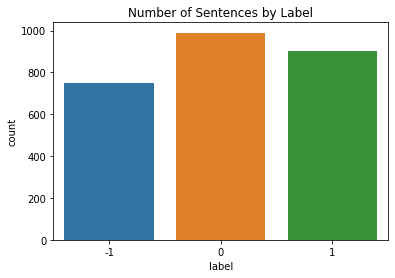

In [28]:
#bar chart of label variable (-1 is neutral, 0 is positive and 1 is negative)
plt.title('Number of Sentences by Label')
sns.countplot(x=data['label'],label='Count')

<AxesSubplot:title={'center':'Histogram of Compound Score'}, xlabel='Compound Score', ylabel='Frequency'>

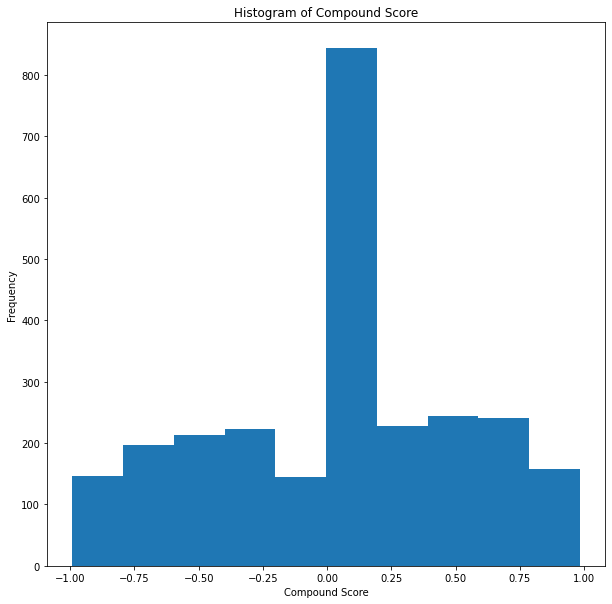

In [29]:
#histogram of compound score variable
plt.figure(figsize=(10,10))
plt.xlabel('Compound Score')
data['compoundscore'].plot(kind='hist',title='Histogram of Compound Score')

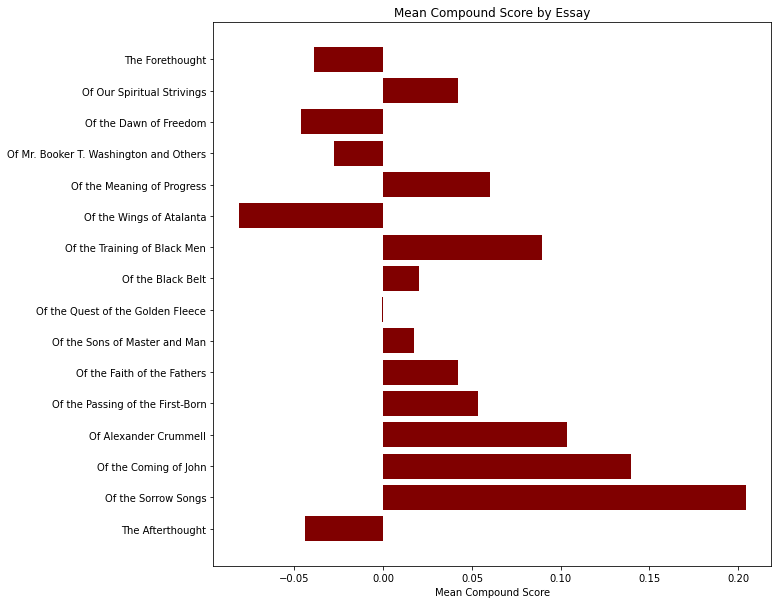

In [30]:
#bar chart of mean compound score by essay
mean_cps_by_essay=data.groupby('title')['compoundscore'].mean()
means=[mean_cps_by_essay[0],mean_cps_by_essay[1],mean_cps_by_essay[2],mean_cps_by_essay[3],mean_cps_by_essay[4],mean_cps_by_essay[5],mean_cps_by_essay[6],mean_cps_by_essay[7],mean_cps_by_essay[8],mean_cps_by_essay[9],mean_cps_by_essay[10],mean_cps_by_essay[11],mean_cps_by_essay[12],mean_cps_by_essay[13],mean_cps_by_essay[14], mean_cps_by_essay[15]]
plt.figure(figsize=(10,10))
plt.barh(y=titles,width=means,height=0.8,left=0, align='center', color='maroon')
plt.gca().invert_yaxis()
plt.xlabel('Mean Compound Score')
plt.title('Mean Compound Score by Essay')
plt.show()

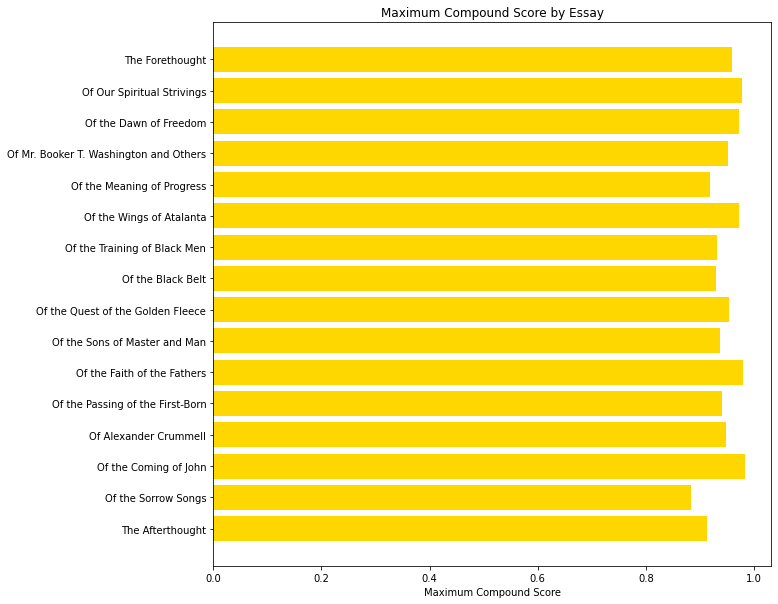

In [31]:
#bar chart of maximum compound score by essay
max_cps_by_essay=data.groupby('title')['compoundscore'].max()
maximum=[max_cps_by_essay[0],max_cps_by_essay[1],max_cps_by_essay[2],max_cps_by_essay[3],max_cps_by_essay[4],max_cps_by_essay[5],max_cps_by_essay[6],max_cps_by_essay[7],max_cps_by_essay[8],max_cps_by_essay[9],max_cps_by_essay[10],max_cps_by_essay[11],max_cps_by_essay[12],max_cps_by_essay[13],max_cps_by_essay[14], max_cps_by_essay[15]]
plt.figure(figsize=(10,10))
plt.barh(y=titles,width=maximum,height=0.8,left=0, align='center', color='gold')
plt.gca().invert_yaxis()
plt.xlabel('Maximum Compound Score')
plt.title('Maximum Compound Score by Essay')
plt.show()

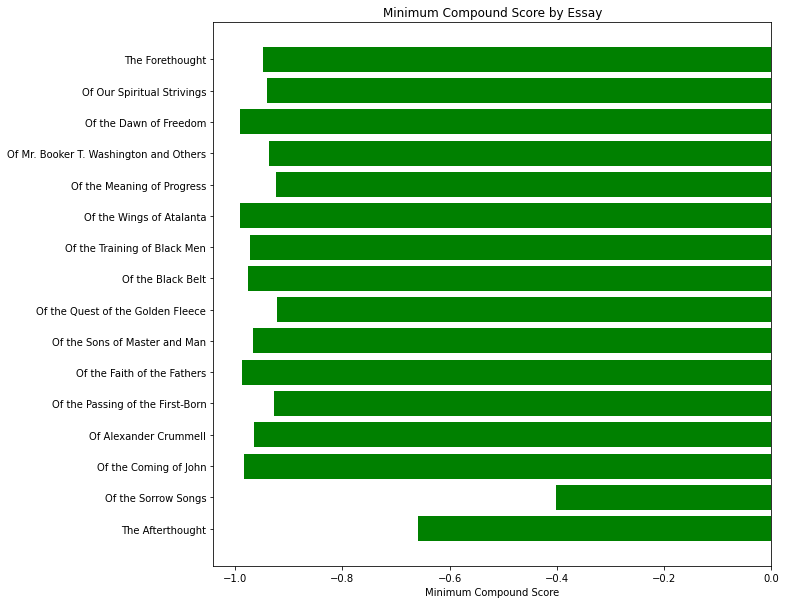

In [32]:
#bar chart of minimum compound score by essay
min_cps_by_essay=data.groupby('title')['compoundscore'].min()
minimum=[min_cps_by_essay[0],min_cps_by_essay[1],min_cps_by_essay[2],min_cps_by_essay[3],min_cps_by_essay[4],min_cps_by_essay[5],min_cps_by_essay[6],min_cps_by_essay[7],min_cps_by_essay[8],min_cps_by_essay[9],min_cps_by_essay[10],min_cps_by_essay[11],min_cps_by_essay[12],min_cps_by_essay[13],min_cps_by_essay[14], min_cps_by_essay[15]]
plt.figure(figsize=(10,10))
plt.barh(y=titles,width=minimum,height=0.8,left=0, align='center', color='green')
plt.gca().invert_yaxis()
plt.xlabel('Minimum Compound Score')
plt.title('Minimum Compound Score by Essay')
plt.show()

<AxesSubplot:title={'center':'Histogram of Sentence Length'}, xlabel='Sentence Length', ylabel='Frequency'>

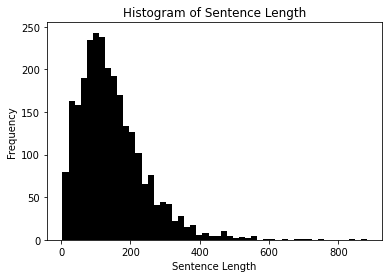

In [33]:
#histogram of length variable
plt.xlabel('Sentence Length')
data['length'].plot(bins=50, kind='hist', title='Histogram of Sentence Length', color='black') 

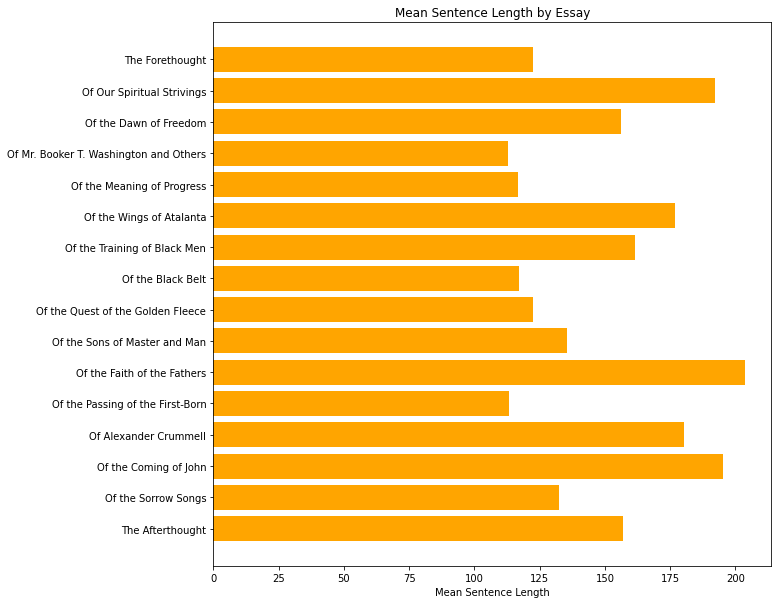

In [34]:
#bar chart of mean length by essay
mean_length_by_essay=data.groupby("title")['length'].mean()
mean_length=[mean_length_by_essay[0],mean_length_by_essay[1],mean_length_by_essay[2],mean_length_by_essay[3],mean_length_by_essay[4],mean_length_by_essay[5],mean_length_by_essay[6],mean_length_by_essay[7],mean_length_by_essay[8],mean_length_by_essay[9],mean_length_by_essay[10],mean_length_by_essay[11],mean_length_by_essay[12],mean_length_by_essay[13],mean_length_by_essay[14], mean_length_by_essay[15]]
plt.figure(figsize=(10,10))
plt.barh(y=titles,width=mean_length,height=0.8,left=0, align='center', color='orange')
plt.gca().invert_yaxis()
plt.xlabel('Mean Sentence Length')
plt.title('Mean Sentence Length by Essay')
plt.show()

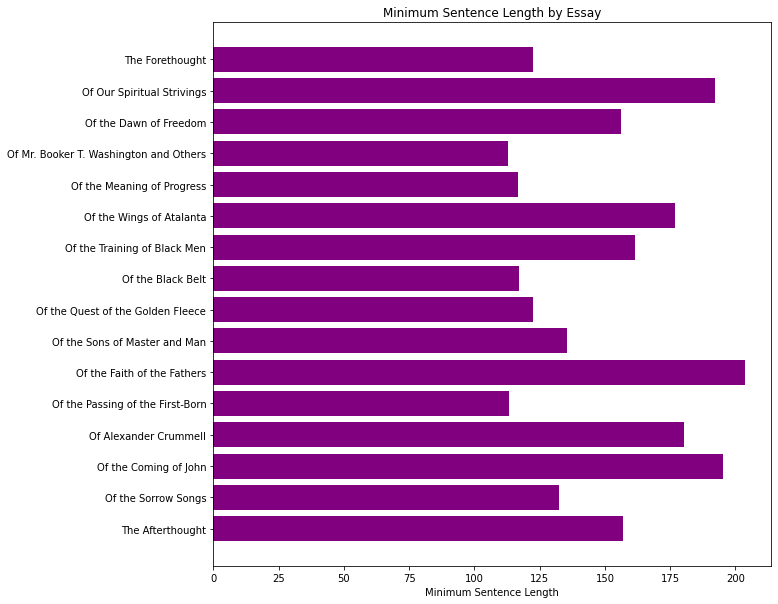

In [35]:
#bar chart of shortest length by essay
min_length_by_essay=data.groupby("title")['length'].mean()
min_length=[min_length_by_essay[0],min_length_by_essay[1],min_length_by_essay[2],min_length_by_essay[3],min_length_by_essay[4],min_length_by_essay[5],min_length_by_essay[6],min_length_by_essay[7],min_length_by_essay[8],min_length_by_essay[9],min_length_by_essay[10],min_length_by_essay[11],min_length_by_essay[12],min_length_by_essay[13],min_length_by_essay[14], min_length_by_essay[15]]
plt.figure(figsize=(10,10))
plt.barh(y=titles,width=min_length,height=0.8,left=0, align='center', color='purple')
plt.gca().invert_yaxis()
plt.xlabel('Minimum Sentence Length')
plt.title('Minimum Sentence Length by Essay')
plt.show()

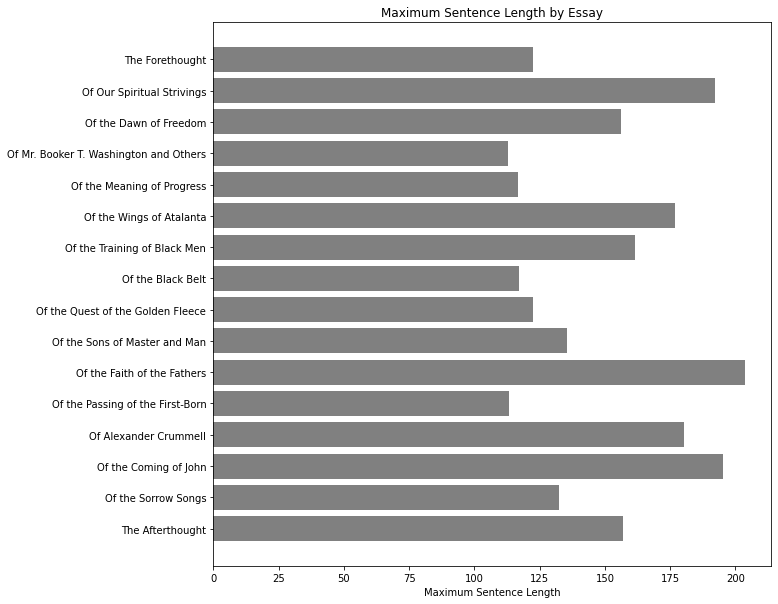

In [36]:
#bar chart of longest length by essay
max_length_by_essay=data.groupby("title")['length'].mean()
max_length=[max_length_by_essay[0],max_length_by_essay[1],max_length_by_essay[2],max_length_by_essay[3],max_length_by_essay[4],max_length_by_essay[5],max_length_by_essay[6],max_length_by_essay[7],max_length_by_essay[8],max_length_by_essay[9],max_length_by_essay[10],max_length_by_essay[11],max_length_by_essay[12],max_length_by_essay[13],max_length_by_essay[14], max_length_by_essay[15]]
plt.figure(figsize=(10,10))
plt.barh(y=titles,width=max_length,height=0.8,left=0, align='center', color='gray')
plt.gca().invert_yaxis()
plt.xlabel('Maximum Sentence Length')
plt.title('Maximum Sentence Length by Essay')
plt.show()

## Data cleaning-removing punctuation & stopwords & prep for tokenization

In [37]:
#create pipline to clean data by removing punctuation and stopwords

def message_cleaning(message):
    #remove puctuation from text
    #put text column into a single list
    sentences=message.tolist()
    #make list into a single string instead of having multiple elements
    sentences_as_one_string = " ".join(sentences)
    #remove punctuation from text
    Text_punc_removed1 = [char for char in sentences_as_one_string if char not in string.punctuation]
    #make string again
    Text_punc_removed2=''.join(Text_punc_removed1)
    #make sure each word is an element
    Text_punc_removed3=list(Text_punc_removed2.split(" "))
    #make all leters lowercase
    Text_punc_removed4 = [w.lower() for w in Text_punc_removed3]
    #remove stop words from text
    #create empty string
    filtered_text = []
    #create list of English stopwords
    stop_words = set(stopwords.words('english'))
    #for loop going over Text_punc_removed4
    for w in Text_punc_removed4:
    #add words to empty list if they aren't in stop words list
       if w not in stop_words:    
          filtered_text.append(w)
    #prep for tokenization put filtered text into a single string
    Text_punc_stop_removed=' '.join(filtered_text)
    return Text_punc_stop_removed

## Tokenization-entire book

In [38]:
#use word_tokenize function to tokenize text 
cleaned_text=message_cleaning(data['text'])
tokenized_word = word_tokenize(cleaned_text)

In [39]:
#get number of tokens from length of list
len(tokenized_word)

36656

In [40]:
#get number of unique tokens
len(set(tokenized_word))

9041

In [41]:
#calculate measure of lexical richness in text (percent of total tokens that are unique)
#number of unique tokens/number of all tokens *100
len(set(tokenized_word))/len(tokenized_word)*100

24.664447839371455

In [42]:
#put tokenized text back into data frame
fdict={'text':tokenized_word}
filter_df=pd.DataFrame(fdict)

In [43]:
#clean data (getting rid of rows with strange characters or blank rows)
filter_df['length']=filter_df['text'].apply(len)
filter_df=filter_df[~filter_df.text.isin(['“','’','”'])]
filter_df=filter_df.loc[filter_df['length']>3]

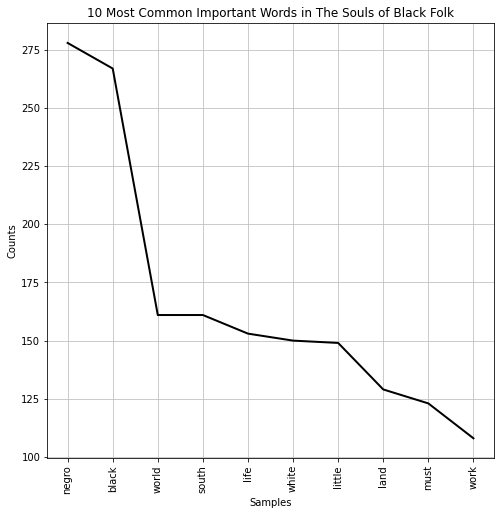

<AxesSubplot:title={'center':'10 Most Common Important Words in The Souls of Black Folk'}, xlabel='Samples', ylabel='Counts'>

In [44]:
#get filtered text to list
f1=filter_df['text'].tolist()
#plot frequency distribution
fdist = FreqDist(f1)
plt.figure(figsize=(8,8))
fdist.plot(10,title="10 Most Common Important Words in The Souls of Black Folk", color='black')

## Tokenization of postive sentences in book

In [45]:
#create dataframe with just positive sentences
positive=data[data['label']==0]
#use word_tokenize function to tokenize text 
cleaned_text_p=message_cleaning(positive['text'])
tokenized_word_p = word_tokenize(cleaned_text_p)

In [46]:
#get number of tokens from length of list
len(tokenized_word_p)

16032

In [47]:
#get number of unique tokens
len(set(tokenized_word_p))

5450

In [48]:
#calculate measure of lexical richness in text (percent of total tokens that are unique)
#number of unique tokens/number of all tokens *100
len(set(tokenized_word_p))/len(tokenized_word_p)*100

33.99451097804391

In [49]:
#put tokenized text back into data frame
fdict_p={'text':tokenized_word_p}
filter_df_p=pd.DataFrame(fdict_p)

In [50]:
#clean data (getting rid of rows with strange characters or blank rows)
filter_df_p['length']=filter_df_p['text'].apply(len)
filter_df_p=filter_df_p[~filter_df_p.text.isin(['“','’','”'])]
filter_df_p=filter_df_p.loc[filter_df_p['length']>3]

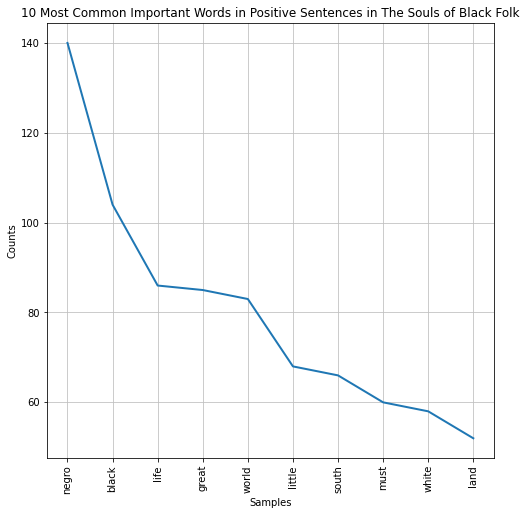

<AxesSubplot:title={'center':'10 Most Common Important Words in Positive Sentences in The Souls of Black Folk'}, xlabel='Samples', ylabel='Counts'>

In [51]:
#get filtered text to list
f1_p=filter_df_p['text'].tolist()
#plot frequency distribution
fdist_p = FreqDist(f1_p)
plt.figure(figsize=(8,8))
fdist_p.plot(10,title="10 Most Common Important Words in Positive Sentences in The Souls of Black Folk")

## Tokenization of negative sentences

In [52]:
#create dataframe with just negative sentences
negative=data[data['label']==1]
#use word_tokenize function to tokenize text 
cleaned_text_n=message_cleaning(negative['text'])
tokenized_word_n = word_tokenize(cleaned_text_n)

In [53]:
#get number of tokens from length of list
len(tokenized_word_n)

13703

In [54]:
#get number of unique tokens
len(set(tokenized_word_n))

5137

In [55]:
#calculate measure of lexical richness in text (percent of total tokens that are unique)
#number of unique tokens/number of all tokens *100
len(set(tokenized_word_n))/len(tokenized_word_n)*100

37.48814128293074

In [56]:
#put tokenized text back into data frame
fdict_n={'text':tokenized_word_n}
filter_df_n=pd.DataFrame(fdict_n)

In [57]:
#clean data (getting rid of rows with strange characters or blank rows)
filter_df_n['length']=filter_df_n['text'].apply(len)
filter_df_n=filter_df_n[~filter_df_n.text.isin(['“','’','”'])]
filter_df_n=filter_df_n.loc[filter_df_n['length']>3]

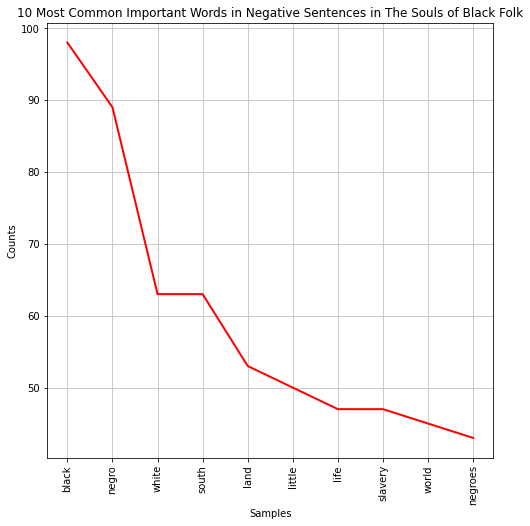

<AxesSubplot:title={'center':'10 Most Common Important Words in Negative Sentences in The Souls of Black Folk'}, xlabel='Samples', ylabel='Counts'>

In [58]:
#get filtered text to list
f1_n=filter_df_n['text'].tolist()
#plot frequency distribution
fdist_n = FreqDist(f1_n)
plt.figure(figsize=(8,8))
fdist_n.plot(10,title="10 Most Common Important Words in Negative Sentences in The Souls of Black Folk", color='red')

## Tokenization of neutral sentences

In [59]:
#create dataframe with just neutral sentences
neutral=data[data['label']==-1]
#use word_tokenize function to tokenize text 
cleaned_text_0=message_cleaning(neutral['text'])
tokenized_word_0 = word_tokenize(cleaned_text_0)

In [60]:
#get number of tokens from length of list
len(tokenized_word_0)

6921

In [61]:
#get number of unique tokens
len(set(tokenized_word_0))

2959

In [62]:
#calculate measure of lexical richness in text (percent of total tokens that are unique)
#number of unique tokens/number of all tokens *100
len(set(tokenized_word_0))/len(tokenized_word_0)*100

42.7539372922988

In [63]:
#put tokenized text back into data frame
fdict_0={'text':tokenized_word_0}
filter_df_0=pd.DataFrame(fdict_0)

In [64]:
#clean data (getting rid of rows with strange characters or blank rows)
filter_df_0['length']=filter_df_0['text'].apply(len)
filter_df_0=filter_df_0[~filter_df_0.text.isin(['“','’','”'])]
filter_df_0=filter_df_0.loc[filter_df_0['length']>3]

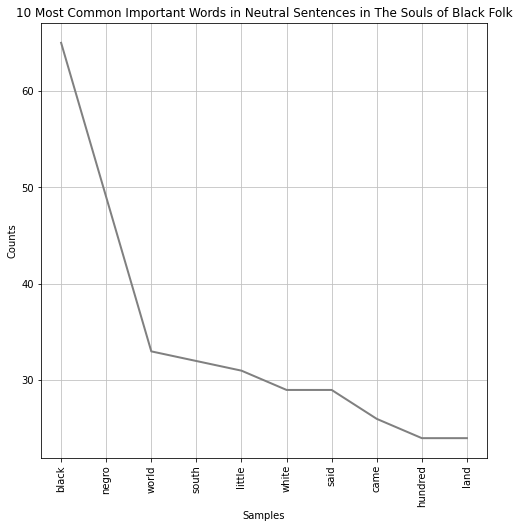

<AxesSubplot:title={'center':'10 Most Common Important Words in Neutral Sentences in The Souls of Black Folk'}, xlabel='Samples', ylabel='Counts'>

In [65]:
#get filtered text to list
f1_0=filter_df_0['text'].tolist()
#plot frequency distribution
fdist_0 = FreqDist(f1_0)
plt.figure(figsize=(8,8))
fdist_0.plot(10,title="10 Most Common Important Words in Neutral Sentences in The Souls of Black Folk", color='gray')

## Plot word cloud for entire book

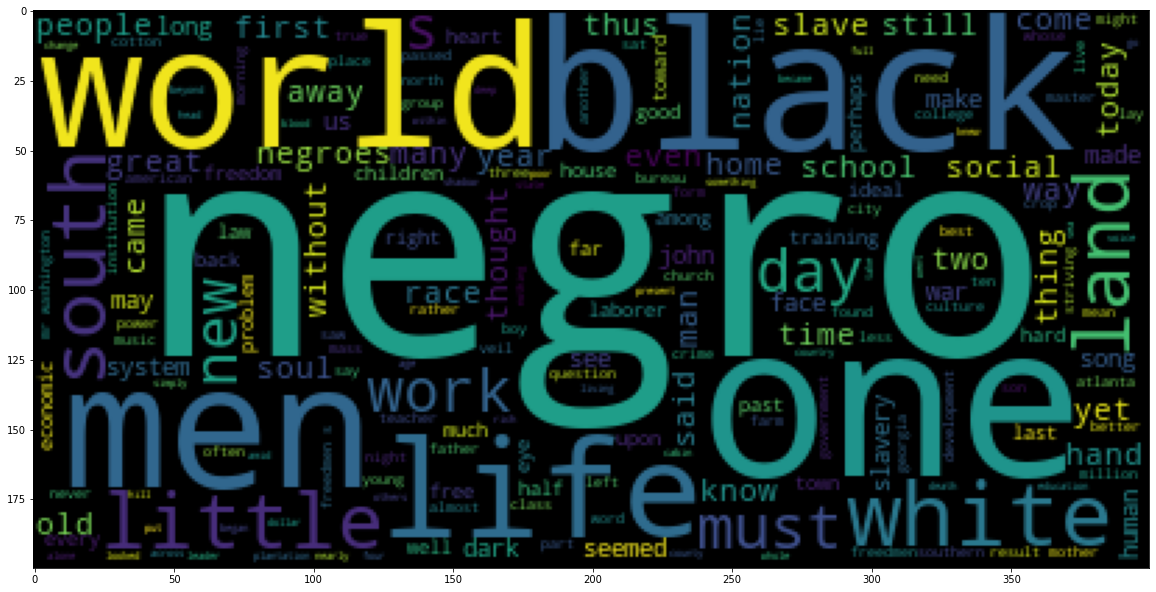

In [66]:
#make list into a single string instead of having multiple elements
tokenized_word_single_string = " ".join(tokenized_word)
#plot word cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(tokenized_word_single_string))

## Plot word cloud for positive sentences

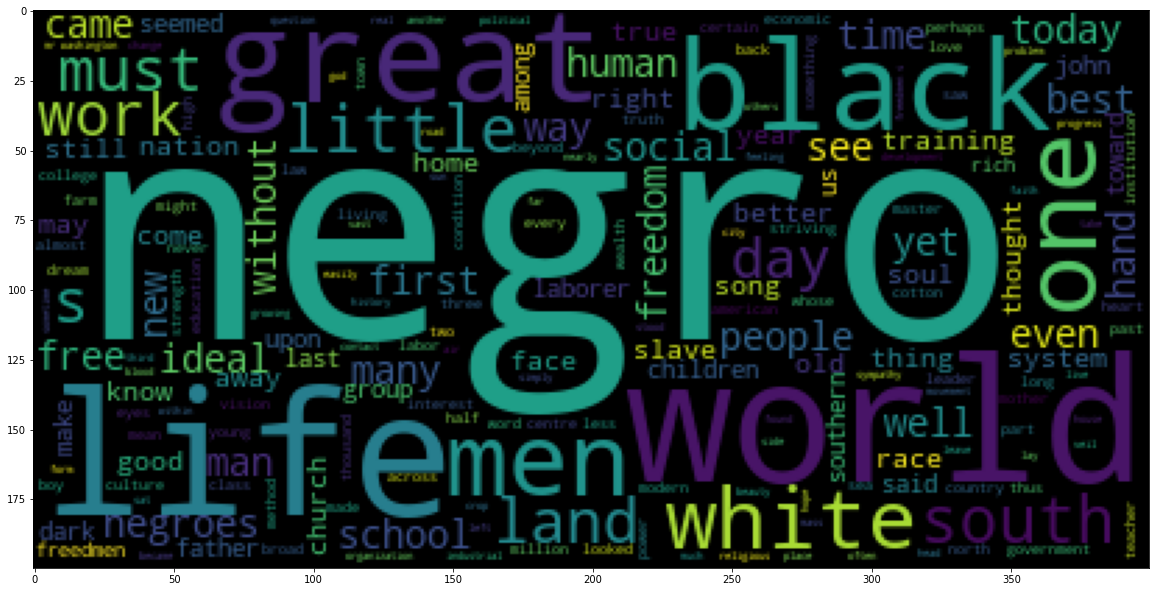

In [67]:
#make list into a single string instead of having multiple elements
tokenized_word_single_string_p = " ".join(tokenized_word_p)
#plot word cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(tokenized_word_single_string_p))

## Plot word cloud for negative sentences

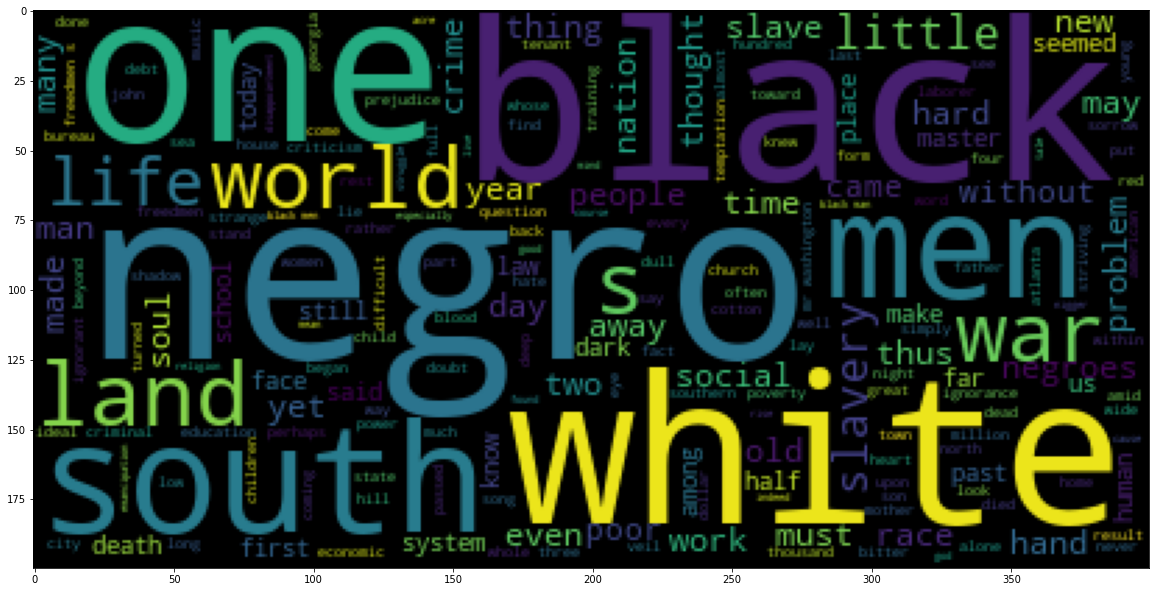

In [68]:
#make list into a single string instead of having multiple elements
tokenized_word_single_string_n = " ".join(tokenized_word_n)
#plot word cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(tokenized_word_single_string_n))

## Plot word cloud for neutral sentences

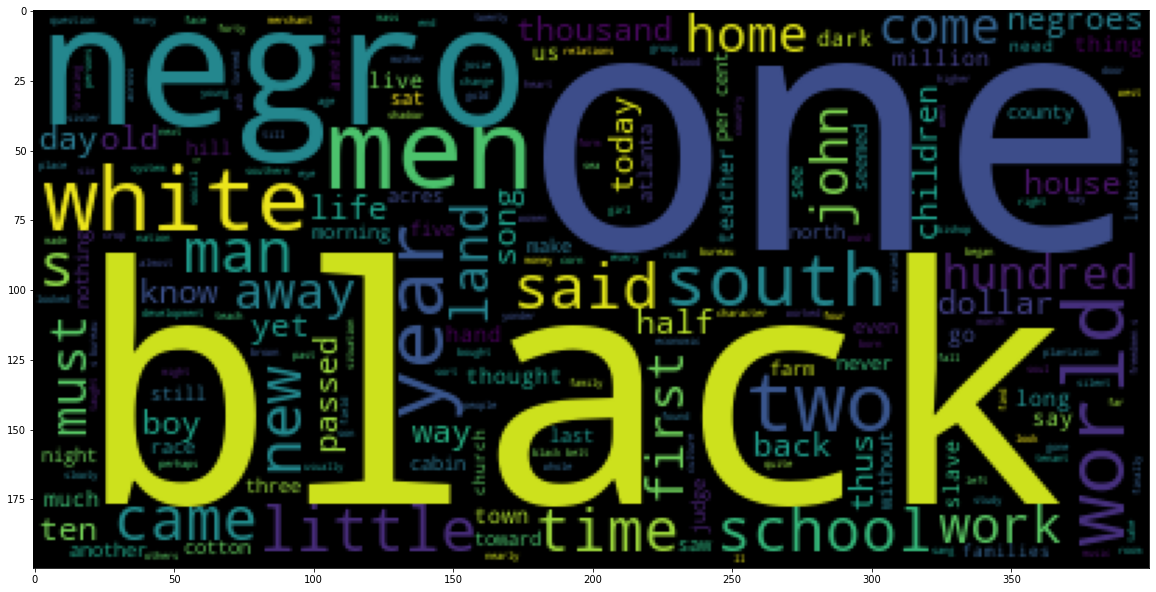

In [69]:
#make list into a single string instead of having multiple elements
tokenized_word_single_string_0 = " ".join(tokenized_word_0)
#plot word cloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(tokenized_word_single_string_0))

## Machine Learning-Train Naive Bayes Classifier Models to Predict Sentiment

In [70]:
#create pipline to clean column
def message_cleaning1(message):
    Text_punc_removed = [char for char in message if char not in string.punctuation]
    Text_punc_removed_join = ''.join(Text_punc_removed)
    Text_punc_removed_join_clean = [word for word in Text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Text_punc_removed_join_clean
# put pipeline into vectorizer to clean text column and vectorize it
text_countvectorizer = CountVectorizer(analyzer = message_cleaning1, dtype = 'uint8').fit_transform(data['text'])

In [71]:
x=text_countvectorizer
x.shape

(2640, 9866)

In [72]:
y = data['label']
y.shape

(2640,)

In [73]:
#create test and train datasets with test dataset containing 20% of cases
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [74]:
#training naive bayes classifier
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

<AxesSubplot:>

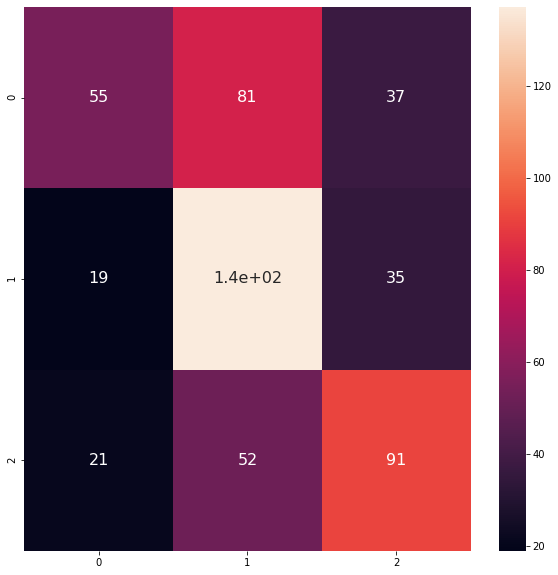

In [75]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,annot_kws={"fontsize":16})

In [76]:
#print classification
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

          -1       0.58      0.32      0.41       173
           0       0.51      0.72      0.59       191
           1       0.56      0.55      0.56       164

    accuracy                           0.54       528
   macro avg       0.55      0.53      0.52       528
weighted avg       0.55      0.54      0.52       528



In [77]:
#to deal with the low accuracy of the previous model, I took out the neutral cases and created a dataset with only negative and positive cases
data_np=data[data['label'] !=-1]

In [78]:
# put pipeline into vectorizer to clean text column and vectorize it
text_countvectorizer = CountVectorizer(analyzer = message_cleaning1, dtype = 'uint8').fit_transform(data_np['text'])

In [79]:
x=text_countvectorizer
x.shape

(1892, 8682)

In [80]:
y = data_np['label']
y.shape

(1892,)

In [81]:
#create test and train datasets with test dataset containing 20% of cases
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [82]:
#training naive bayes classifier
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

<AxesSubplot:>

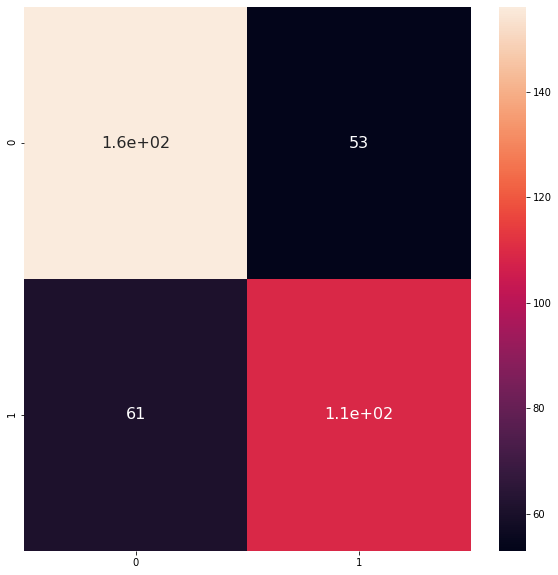

In [83]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,annot_kws={"fontsize":16})

In [84]:
#print classification
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       209
           1       0.67      0.64      0.66       170

    accuracy                           0.70       379
   macro avg       0.70      0.69      0.69       379
weighted avg       0.70      0.70      0.70       379

